In [1]:
import numpy as np
import pandas as pd
import time
import cv2
import RPi.GPIO as GPIO
import xbox
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
GPIO_RIGHT_BACK = 17
GPIO_RIGHT_FRONT = 18
GPIO_LEFT_BACK = 27
GPIO_LEFT_FRONT = 22
GPIO_LEFT_EN = 23
GPIO_RIGHT_EN = 24

GPIO.setmode(GPIO.BCM)
GPIO.setwarnings(False)

GPIO.setup(GPIO_RIGHT_BACK, GPIO.OUT)
GPIO.setup(GPIO_RIGHT_FRONT, GPIO.OUT)
GPIO.setup(GPIO_LEFT_BACK, GPIO.OUT)
GPIO.setup(GPIO_LEFT_FRONT, GPIO.OUT)
GPIO.setup(GPIO_LEFT_EN, GPIO.OUT)
GPIO.setup(GPIO_RIGHT_EN, GPIO.OUT)

In [3]:
# Throttle
# o = nothing
# 1 = forward
# 2 = backward
# Steering
# o = nothing
# 1 = left
# 2 = right
def apply_action(throttle, steering):
    if throttle == 1:
        GPIO.output(GPIO_RIGHT_BACK, 0)
        GPIO.output(GPIO_RIGHT_FRONT, 1)
        GPIO.output(GPIO_LEFT_BACK, 0)
        GPIO.output(GPIO_LEFT_FRONT, 1)
    elif throttle == 2:
        GPIO.output(GPIO_RIGHT_BACK, 1)
        GPIO.output(GPIO_RIGHT_FRONT, 0)
        GPIO.output(GPIO_LEFT_BACK, 1)
        GPIO.output(GPIO_LEFT_FRONT, 0)
    else:
        GPIO.output(GPIO_RIGHT_BACK, 0)
        GPIO.output(GPIO_RIGHT_FRONT, 0)
        GPIO.output(GPIO_LEFT_BACK, 0)
        GPIO.output(GPIO_LEFT_FRONT, 0)
        
    if steering == 1:
        GPIO.output(GPIO_LEFT_BACK, 0)
        GPIO.output(GPIO_LEFT_FRONT, 0)
    elif steering == 2:
        GPIO.output(GPIO_RIGHT_BACK, 0)
        GPIO.output(GPIO_RIGHT_FRONT, 0)

In [29]:
joy = xbox.Joystick()
cap = cv2.VideoCapture(0)
GPIO.output(GPIO_RIGHT_EN, 1)
GPIO.output(GPIO_LEFT_EN, 1)

t1 = time.time()
throttle = 0
steering = 0
images = []
actions = []
while not joy.Back():
    # Throttle
    if joy.rightTrigger():
        throttle = 1
    elif joy.leftTrigger():
        throttle = 2
    else:
        throttle = 0

    # Steering
    x, y = joy.leftStick()
    if x < 0.0:
        steering = 1
    elif x > 0.0:
        steering = 2
    else:
        steering = 0
        
    if time.time() - t1 > 1:
        t1 = time.time()
        ret, frame = cap.read()
        if ret:
            images.append(frame)
            actions.append((throttle, steering))
            
    apply_action(throttle, steering)
    
joy.close()
cap.release()
GPIO.output(GPIO_RIGHT_EN, 0)
GPIO.output(GPIO_LEFT_EN, 0)

In [30]:
print('Number records:', len(images))

Number records: 5


In [31]:
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

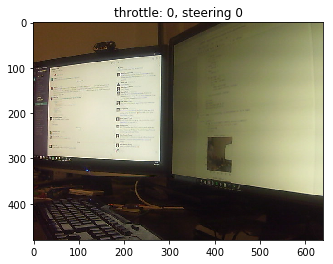

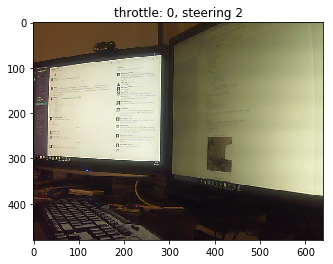

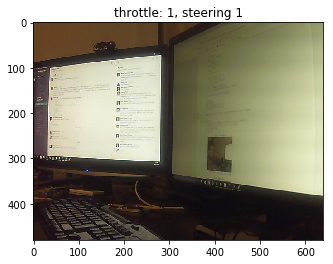

In [32]:
n_samples = 3
for img, act in zip(images[:n_samples], actions[:n_samples]):
    plt.title("throttle: %s, steering %s" % act)
    plt.imshow(img)
    plt.show()